In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
fraud = pd.read_csv("Fraud_check.csv")

In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud = fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})

In [8]:
fraud['income_range'] = np.where(fraud['Taxable_Income']>=30000, 'Good', 'Risky')
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


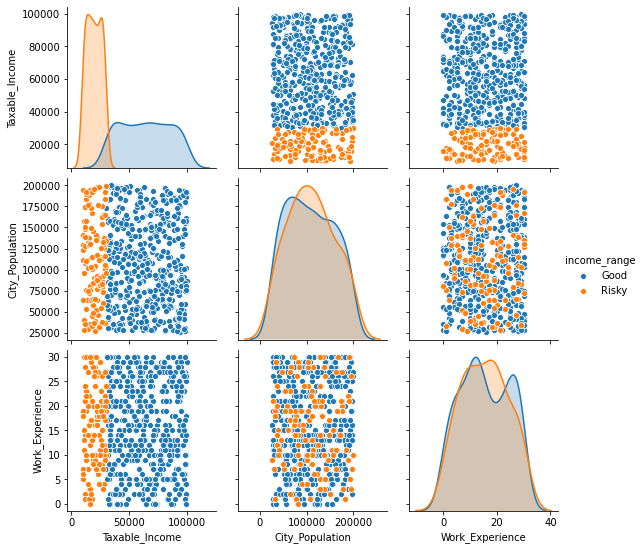

In [10]:
sns.pairplot(fraud,hue='income_range')

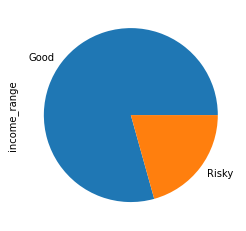

Good     476
Risky    124
Name: income_range, dtype: int64


In [11]:
fraud['income_range'].value_counts().plot.pie()
plt.show()
print(fraud['income_range'].value_counts())

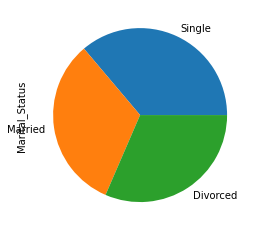

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64


In [12]:
fraud['Marital_Status'].value_counts().plot.pie()
plt.show()
print(fraud['Marital_Status'].value_counts())

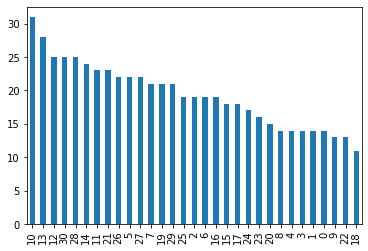

10    31
13    28
12    25
30    25
28    25
14    24
11    23
21    23
26    22
5     22
27    22
7     21
19    21
29    21
25    19
2     19
6     19
16    19
15    18
17    18
24    17
23    16
20    15
8     14
4     14
3     14
1     14
0     14
9     13
22    13
18    11
Name: Work_Experience, dtype: int64


In [13]:
fraud['Work_Experience'].value_counts(sort=True).plot.bar()
plt.show()
print(fraud['Work_Experience'].value_counts())

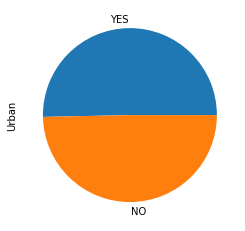

YES    302
NO     298
Name: Urban, dtype: int64


In [14]:
fraud['Urban'].value_counts().plot.pie()
plt.show()
print(fraud['Urban'].value_counts())

In [15]:
label_encoder = preprocessing.LabelEncoder()
fraud_data = fraud[['Undergrad', 'Marital_Status','Urban']].apply(label_encoder.fit_transform)
fraud_data = fraud_data.rename(columns={'Undergrad':'Undergrad_numeric', 'Marital_Status':'Marital_Status_numeric','Urban':'Urban_numeric'})

In [16]:
fraud_data.head()

,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0


In [17]:
fraud_data = pd.concat([fraud,fraud_data], axis=1, sort=False)
fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,NO,Single,68833,50047,10,YES,Good,0,2,1
1,YES,Divorced,33700,134075,18,YES,Good,1,0,1
2,NO,Married,36925,160205,30,YES,Good,0,1,1
3,YES,Single,50190,193264,15,YES,Good,1,2,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0


In [18]:
fraud_data.drop(columns={'Undergrad','Marital_Status','Urban','Taxable_Income'},axis=1)

,City_Population,Work_Experience,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,50047,10,Good,0,2,1
1,134075,18,Good,1,0,1
2,160205,30,Good,0,1,1
3,193264,15,Good,1,2,1
4,27533,28,Good,0,1,0
...,...,...,...,...,...,...
595,39492,7,Good,1,0,1
596,55369,2,Good,1,0,1
597,154058,0,Good,0,0,1
598,180083,17,Good,1,1,0


In [19]:
fraud_data = fraud_data[['City_Population','Work_Experience','Undergrad_numeric','Marital_Status_numeric','Urban_numeric','income_range']]

In [20]:
fraud_data.head()

,City_Population,Work_Experience,Undergrad_numeric,Marital_Status_numeric,Urban_numeric,income_range
0,50047,10,0,2,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,2,1,Good
4,27533,28,0,1,0,Good


In [21]:
colnames=list(fraud_data.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_numeric',
 'Marital_Status_numeric',
 'Urban_numeric',
 'income_range']

In [22]:
fraud_data.income_range.value_counts()

Good     476
Risky    124
Name: income_range, dtype: int64

In [23]:
fraud_data.isnull().sum()

City_Population           0
Work_Experience           0
Undergrad_numeric         0
Marital_Status_numeric    0
Urban_numeric             0
income_range              0
dtype: int64

In [24]:
x=fraud_data.iloc[:,0:5]
y=fraud_data['income_range']

In [25]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
num_trees = 400
max_features = 4
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=400)

In [31]:
accuracy_score(y_test,model.predict(x_test))

0.7333333333333333

In [32]:
confusion_matrix(y_test,model.predict(x_test))

array([[88,  4],
       [28,  0]], dtype=int64)

In [33]:
preds= model.predict(x_test)

In [34]:
pd.Series(preds).value_counts()

Good     116
Risky      4
dtype: int64

In [35]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

In [36]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
income_range,,
Good,88,4
Risky,28,0


In [37]:
np.mean(preds==y_test)

0.7333333333333333